## Time Series Exploratory Data Analysis

We'll start by installing **yfinance**

**`yfinance`** is a Python library designed for retrieving financial data from Yahoo Finance. It allows you to fetch historical stock prices, real-time market data, dividends, splits, and more. With `yfinance`, you can easily download data for individual stocks or multiple symbols directly into a pandas DataFrame for analysis. This tool is especially helpful for building financial models, analyzing market trends, or automating financial data collection in Python workflows. Its simplicity and flexibility make it a go-to library for finance-related projects.

# **Introduction to Time Series**

1. **Definition**: A time series is data collected over time, often at regular intervals.
2. **Components of Time Series**:
   - **Trend**: Long-term movement in the data (upward or downward).
   - **Seasonality**: Short-term, repetitive patterns.
   - **Cyclic**: Long-term oscillations not tied to a calendar.
   - **Noise**: Random variation.
3. **Why Analyze Time Series?**:
   - To understand past behaviors.
   - To predict future values (forecasting).
   - To detect anomalies or unusual patterns.
4. **Visualization**: Always start by plotting the time series to identify patterns.
5. **Models in Time Series**:
   - **ARIMA**: For stationary data with autocorrelation.
   - **SARIMA**: For seasonal data.
   - **LSTM**: A deep learning model for complex patterns.

---

### Key Concepts in Time Series Analysis

**Time series** refers to a sequence of data points collected or recorded at successive points in time, typically at regular intervals. Time series data is widely used in fields such as finance, weather forecasting, stock market analysis, and more. Here's an explanation of key concepts:

---

### **1. Upward Trend**
- An **upward trend** occurs when the values of a time series consistently increase over time.
- **Example**: The rising stock prices of a growing company or an increase in temperature due to global warming.
- **Graphical Representation**: Appears as a line or curve that moves upward as time progresses.

---

### **2. Downward Trend**
- A **downward trend** is the opposite of an upward trend, where the values of the time series consistently decrease over time.
- **Example**: Decreasing sales of a product nearing obsolescence.
- **Graphical Representation**: Appears as a line or curve that moves downward as time progresses.

---

### **3. Stationary Data**
- **Stationary data** is a time series whose statistical properties (mean, variance, autocorrelation) do not change over time.
- **Example**: A time series of random noise.
- **Importance**: Stationary data is a prerequisite for many time series forecasting models like ARIMA, as these models assume the data is stationary.

**Transforming Data to Stationary**:
- Differencing: Subtract the current value from the previous value.
- Log Transformation: Use logarithmic scales to reduce variability.

---

### **4. Cyclic Data**
- **Cyclic data** refers to patterns in a time series that repeat over irregular intervals and are not tied to fixed calendar events.
- **Example**: Business cycles showing economic expansion and contraction over years.
- **Difference from Seasonal Data**: While seasonal data repeats at fixed intervals (e.g., annually), cyclic patterns depend on broader factors and do not have a fixed period.

---

### **Other Key Concepts in Time Series**

#### **5. Seasonality**
- Seasonality refers to recurring patterns or fluctuations in a time series at specific intervals.
- **Example**: Increased sales of ice cream every summer.
- **Identification**: Use decomposition methods to separate seasonality from the trend and residual components.

#### **6. Noise**
- Noise is random variation in the data that does not follow any trend or pattern.
- **Importance**: Reducing noise helps in identifying trends and improving forecasting accuracy.
- **Handling Noise**: Apply smoothing techniques like moving averages.

#### **7. Autocorrelation**
- Autocorrelation measures the relationship between a time series and its lagged values.
- **Significance**: Helps identify patterns, such as whether current values depend on past values.

#### **8. Exponential Smoothing**
- A forecasting technique that applies decreasing weights to older data.
- **Example**: Simple Exponential Smoothing (SES), Holt's Linear Trend, Holt-Winters.

In [5]:
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 2.9 MB/s eta 0:00:002.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-linux_x86_64.whl size=301666 sha256=b31a223734c5c68bc5d3b4b9292216c0744ab1ef4dac242b71406c8a254f0fc7
  Stored in directory: /home/chukwuemeka-james/.cache/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


In [1]:
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
import yfinance as yf
df_tesla = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [3]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [4]:
df_tesla.tail()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-12-17,479.859985,483.989990,457.510010,475.899994,131223000
2024-12-18,440.130005,488.540009,427.010010,466.500000,149340800
2024-12-19,436.170013,456.359985,420.019989,451.880005,118566100
2024-12-20,421.059998,447.079987,417.640015,425.510010,132216200
2024-12-23,430.600006,434.510010,415.410004,431.000000,72412200


In [10]:
df_tesla.columns


MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

<Axes: xlabel='Date'>

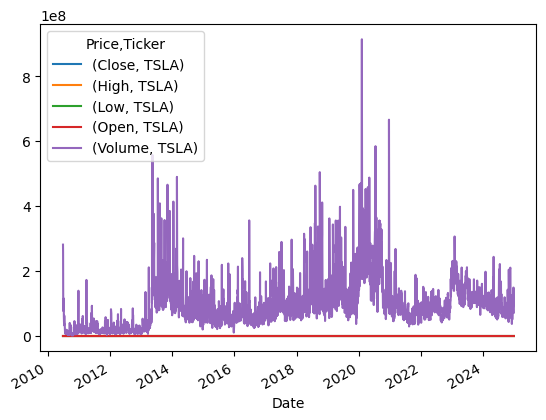

In [7]:
df_tesla.plot()

<Axes: xlabel='Date'>

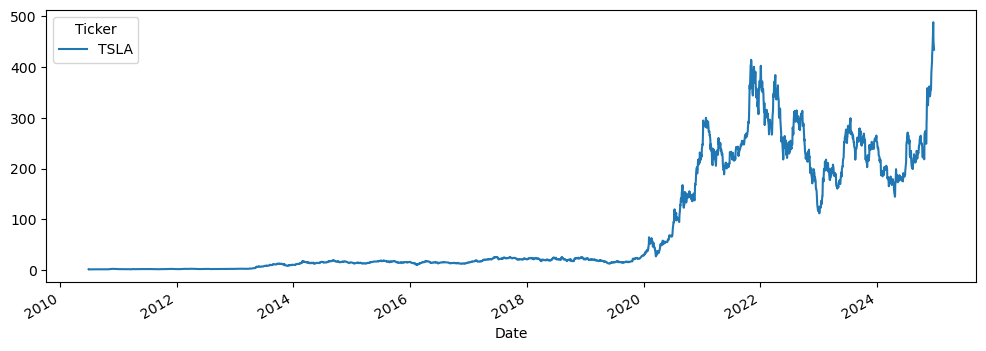

In [9]:
df_tesla['High'].plot(figsize=(12,4))

### Let's closely examine the some part of the graph.

<Axes: xlabel='Date'>

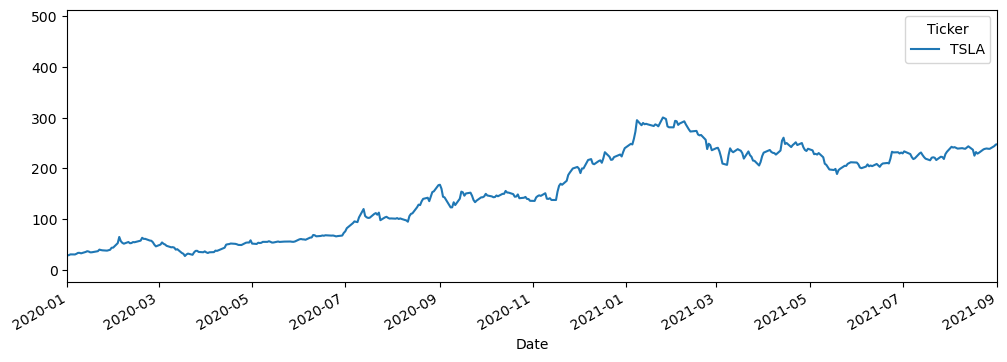

In [9]:
## xlimit and y limit

df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

<Axes: xlabel='Date'>

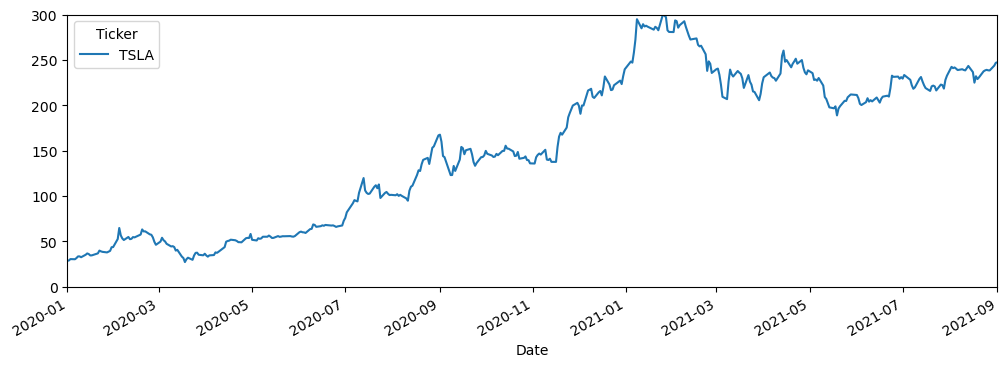

In [14]:
## xlimit and y limit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,300],figsize=(12,4))

<Axes: xlabel='Date'>

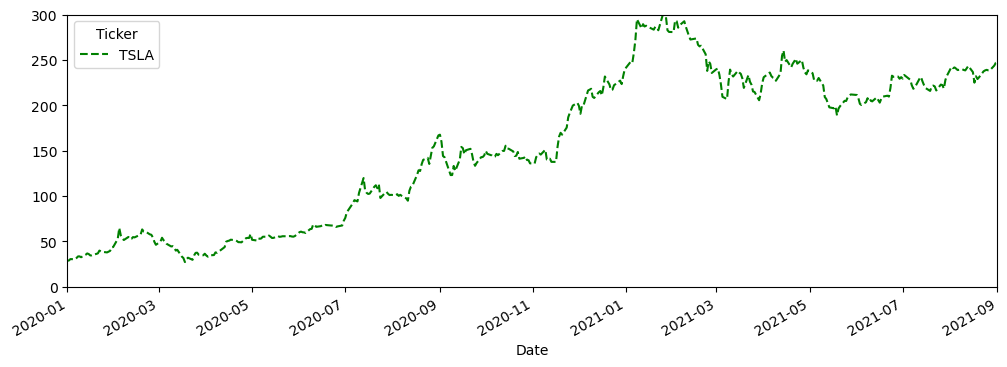

In [15]:
## xlimit and y limit and coloring
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,300],figsize=(12,4),ls='--',c='green')

### Let's see the date range of the data retrieved for 'TSLA'.


In [12]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2024-12-10', '2024-12-11', '2024-12-12', '2024-12-13',
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23'],
              dtype='datetime64[ns]', name='Date', length=3647, freq=None)

In [16]:
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [17]:
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']
share_open

Ticker,TSLA
Date,
2020-01-02,28.299999
2020-01-03,29.366667
2020-01-06,29.364668
2020-01-07,30.760000
2020-01-08,31.580000
...,...
2021-08-26,236.103333
2021-08-27,235.000000
2021-08-30,238.240005


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

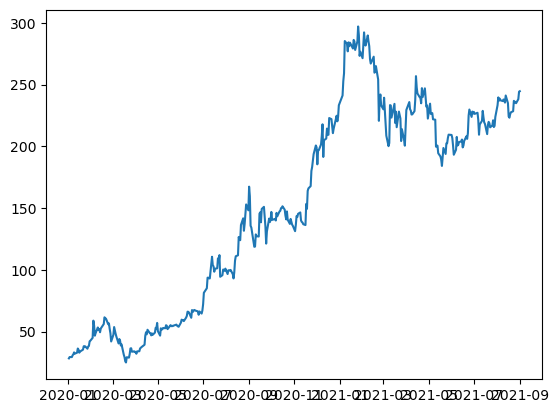

In [22]:
figure,axis=plt.subplots()
axis.plot(index,share_open)
plt.show()

### To remove the overlapping effect let's take the following steps.

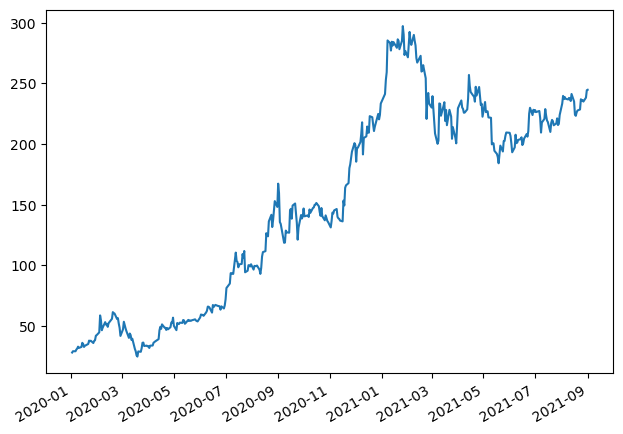

In [25]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)
plt.show()

## Let's now look at Datetime Index

Previously we looked at **Datetime Data** now we are going to look at **Datetime Index**

In [26]:
df_tesla_index=df_tesla.reset_index()

In [27]:
df_tesla_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        3647 non-null   datetime64[ns]
 1   (Close, TSLA)   3647 non-null   float64       
 2   (High, TSLA)    3647 non-null   float64       
 3   (Low, TSLA)     3647 non-null   float64       
 4   (Open, TSLA)    3647 non-null   float64       
 5   (Volume, TSLA)  3647 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 171.1 KB


In [ ]:
pd.to_datetime(df_tesla_index['Date'])

In [29]:
df_tesla_index=df_tesla_index.set_index('Date',drop=True)

In [30]:
df_tesla_index.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


### Let's now look at **Datetime**

In [31]:
# datetime

from datetime import datetime

In [32]:
datetime.now()

datetime.datetime(2024, 12, 24, 12, 13, 54, 810273)

### We can also feed our choice datetime to the function `datetime()`

In [35]:
date = datetime(2024, 12,24)

In [36]:
date.date()

datetime.date(2024, 12, 24)

In [37]:
date.day

24

In [38]:
date.weekday()

1

In [39]:
date.year

2024

In [40]:
date.month

12

## Time Resampling

**`Time resampling`** in time series analysis refers to the process of changing **the frequency of the time series data** to a higher or lower time granularity. It is often used to either **downsample (reduce the frequency) or upsample (increase the frequency) data,** depending on the specific use case. Time resampling can help in smoothing, aggregation, or aligning time series data when different datasets have varying time intervals.

In [41]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


### Let's look as the `resample()` method.

In Python, the `resample()` method is used with **pandas** to change the frequency of a time series data. It allows you to convert data from one time frequency to another (e.g., from minute data to hourly or daily data). This method is particularly useful when dealing with time series datasets, as it enables you to aggregate, interpolate, or adjust the granularity of data for analysis or modeling.

### How `resample()` Works:
- The `resample()` method works similarly to the `groupby()` function in pandas, but it operates on time-based indices. It’s mainly used for **downsampling** (reducing the frequency of the data) or **upsampling** (increasing the frequency of the data).
- The **rule** parameter in `resample()` defines the new frequency. This rule tells pandas how to group the data. For example, you might want to group data by day (`'D'`), by month (`'M'`), or by hour (`'H'`), etc.

### Common Rules in `resample()`:
- `'D'`: Daily frequency
- `'W'`: Weekly frequency
- `'M'`: Monthly frequency
- `'YE'`: Annual frequency
- `'H'`: Hourly frequency
- `'T'` or `'min'`: Minute frequency
- `'S'`: Second frequency


Syntax `df.resample(rule='A')`
The **rule** parameter controls how the time series is resampled, and depending on the desired outcome, you can apply various aggregation methods to summarize the data for the new frequency.

In [46]:
df_tesla.resample(rule='YE')

### We have 5 years data, now let's see what the minimum values will be with an `Anual resample` resampling rule.

The code below will output what the minimum `High, Low, Open, Close and Volum` was all through the year.

In [45]:
df_tesla.resample(rule='YE').min()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-12-31,1.053333,1.108667,0.998667,1.076000,1777500
2011-12-31,1.455333,1.484667,1.407333,1.452000,3594000
2012-12-31,1.519333,1.790000,1.509333,1.774667,5473500
2013-12-31,2.194000,2.225333,2.140667,2.205333,6603000
2014-12-31,9.289333,9.800000,9.111333,9.366667,19983000
2015-12-31,12.333333,12.619333,12.093333,12.388667,10620000
2016-12-31,9.578000,10.331333,9.403333,9.488000,24892500
2017-12-31,14.466000,14.688667,14.064000,14.316667,32800500


In [48]:
df_tesla.resample(rule='YE').max()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-12-31,2.364667,2.428000,2.316667,2.391333,281494500
2011-12-31,2.329333,2.333333,2.268667,2.308667,172767000
2012-12-31,2.534000,2.663333,2.474000,2.546000,85206000
2013-12-31,12.891333,12.966667,12.558000,12.930667,557458500
2014-12-31,19.069332,19.427999,18.693333,19.177999,490225500
2015-12-31,18.817333,19.110001,18.420000,18.680000,234744000
2016-12-31,17.694668,17.955999,16.967333,17.763332,356136000
2017-12-31,25.666668,25.974001,25.290001,25.779333,296871000


### Let's plot the opening princes `Open` from the above dataframe.

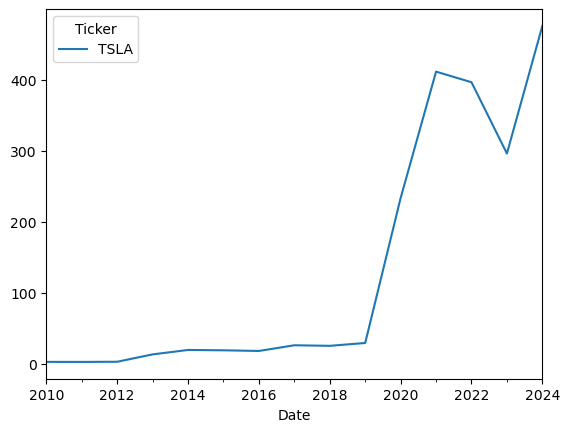

In [51]:
df_tesla.resample(rule='YE').max()['Open'].plot()
plt.show()

### Quarter Start and Quarter End
- **Quarter Start (`QS`)**: Resamples the data so that each data point corresponds to the first date of each financial quarter. For example, if the original data is daily data, applying `.resample('QS')` will aggregate it to the first day of each quarter (i.e., January 1st, April 1st, July 1st, October 1st, and so on).


This will take the first value from each quarter for the **Close** column, grouping the data by the quarter's start date.

### Key Notes:
- **Quarter Start (`QS`)**: Refers to the first day of the quarter.
- **Quarter End (`Q`)**: Would refer to the last day of the quarter.

This rule can be useful when analyzing financial data, as many companies report earnings or other important events on a quarterly basis.

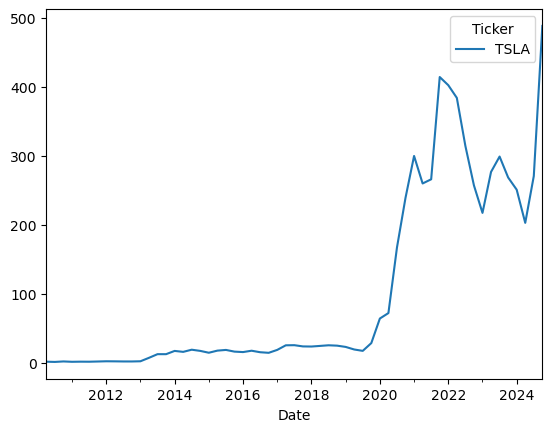

In [ ]:
df_tesla.resample(rule='QS').max()['High'].plot()
plt.show()

### Business Frequency (`B`) and Business Year End (`BA`) in Time Series Resampling

In time series resampling, **Business Frequency (`B`)** and **Business Year End (`BA`)** are two important rules used to adjust the frequency of data based on business days and the business year.

- **Business Frequency (`B`)**: This rule resamples data to business days (weekdays, Monday to Friday) while excluding weekends and holidays. It is useful when you want to align your data to weekdays, such as adjusting daily stock market data to include only the days that trading occurs.

- **Business Year End (`BA`)**: This rule resamples data to the **last business day of each year**. It is commonly used in financial analysis, where reporting and calculations often occur at the end of the business year. This rule focuses on the end of the year, specifically the last weekday before the calendar year ends.

- **`B`** is used to ensure data aligns with weekdays (business days) throughout the year.
- **`BA`** is used to focus on the **last business day** of each year, making it ideal for year-end reporting.

In [53]:
df_tesla.resample(rule='B').max()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500.0
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500.0
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000.0
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000.0
2010-07-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-12-17,479.859985,483.989990,457.510010,475.899994,131223000.0
2024-12-18,440.130005,488.540009,427.010010,466.500000,149340800.0


In [54]:
df_tesla.resample(rule='BA').max()

/tmp/ipykernel_7622/1680491384.py:1: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  df_tesla.resample(rule='BA').max()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-12-31,2.364667,2.428000,2.316667,2.391333,281494500
2011-12-30,2.329333,2.333333,2.268667,2.308667,172767000
2012-12-31,2.534000,2.663333,2.474000,2.546000,85206000
2013-12-31,12.891333,12.966667,12.558000,12.930667,557458500
2014-12-31,19.069332,19.427999,18.693333,19.177999,490225500
2015-12-31,18.817333,19.110001,18.420000,18.680000,234744000
2016-12-30,17.694668,17.955999,16.967333,17.763332,356136000
2017-12-29,25.666668,25.974001,25.290001,25.779333,296871000


### Business Quarter Start (`BQS`) in Time Series Resampling

**Business Quarter Start (`BQS`)** is a resampling rule used in time series analysis to resample data to the **first business day of each quarter**. A quarter refers to a three-month period in a calendar year, and this rule focuses on the **start of each business quarter**.

- **Business Quarter Start (`BQS`)**: This rule aligns the data to the first business day of each quarter (i.e., the first weekday in January, April, July, and October), excluding weekends and holidays. It's useful when you want to work with quarterly data or perform calculations aligned to the start of each quarter.

For example:
- **Q1** starts in January.
- **Q2** starts in April.
- **Q3** starts in July.
- **Q4** starts in October.

### Use Cases
- **Financial Analysis**: Quarterly reporting, where you need data to align with the start of each business quarter.
- **Sales/Marketing Analytics**: To track metrics or performance from the start of each quarter in a business context.

### Summary:
- **`BQS`** stands for the **first business day of each quarter**.
- It helps you aggregate or analyze data based on the start of each business quarter.

In [55]:
df_tesla.resample(rule='BQS').max()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-04-01,1.592667,2.028000,1.553333,1.719333,281494500
2010-07-01,1.465333,1.728000,1.408667,1.666667,123282000
2010-10-01,2.364667,2.428000,2.316667,2.391333,139528500
2011-01-03,1.896667,1.914000,1.870000,1.906000,172767000
2011-04-01,2.009333,2.100000,1.970000,2.006667,93138000
2011-07-01,1.982000,2.029333,1.934000,1.992667,45967500
2011-10-03,2.329333,2.333333,2.268667,2.308667,58024500
2012-01-02,2.529333,2.663333,2.474000,2.546000,82506000


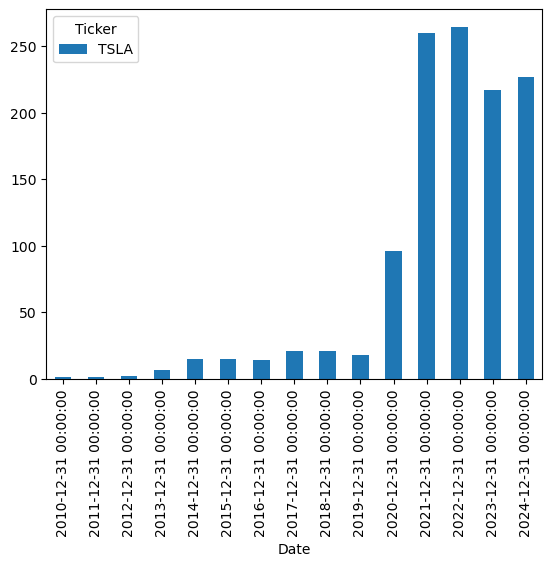

In [57]:
##plotting
df_tesla['Open'].resample(rule='YE').mean().plot(kind='bar')
plt.show()

In pandas, the **`ME`** (Month End) frequency rule is used for time series resampling and indicates that the data will be aligned or resampled to the end of each calendar month. 

You are correct that **`M`** (Month End frequency) was previously referred to simply as **`M`**, but **`M`** has not been deprecated—it still works and is synonymous with **`ME`**.

### Usage of `ME` (or `M`):
- Aligns data to the **last calendar day** of each month.
- Useful in financial or business contexts where end-of-month reporting is standard.

### Key Points:
- **`ME`** aligns to the last day of each month.

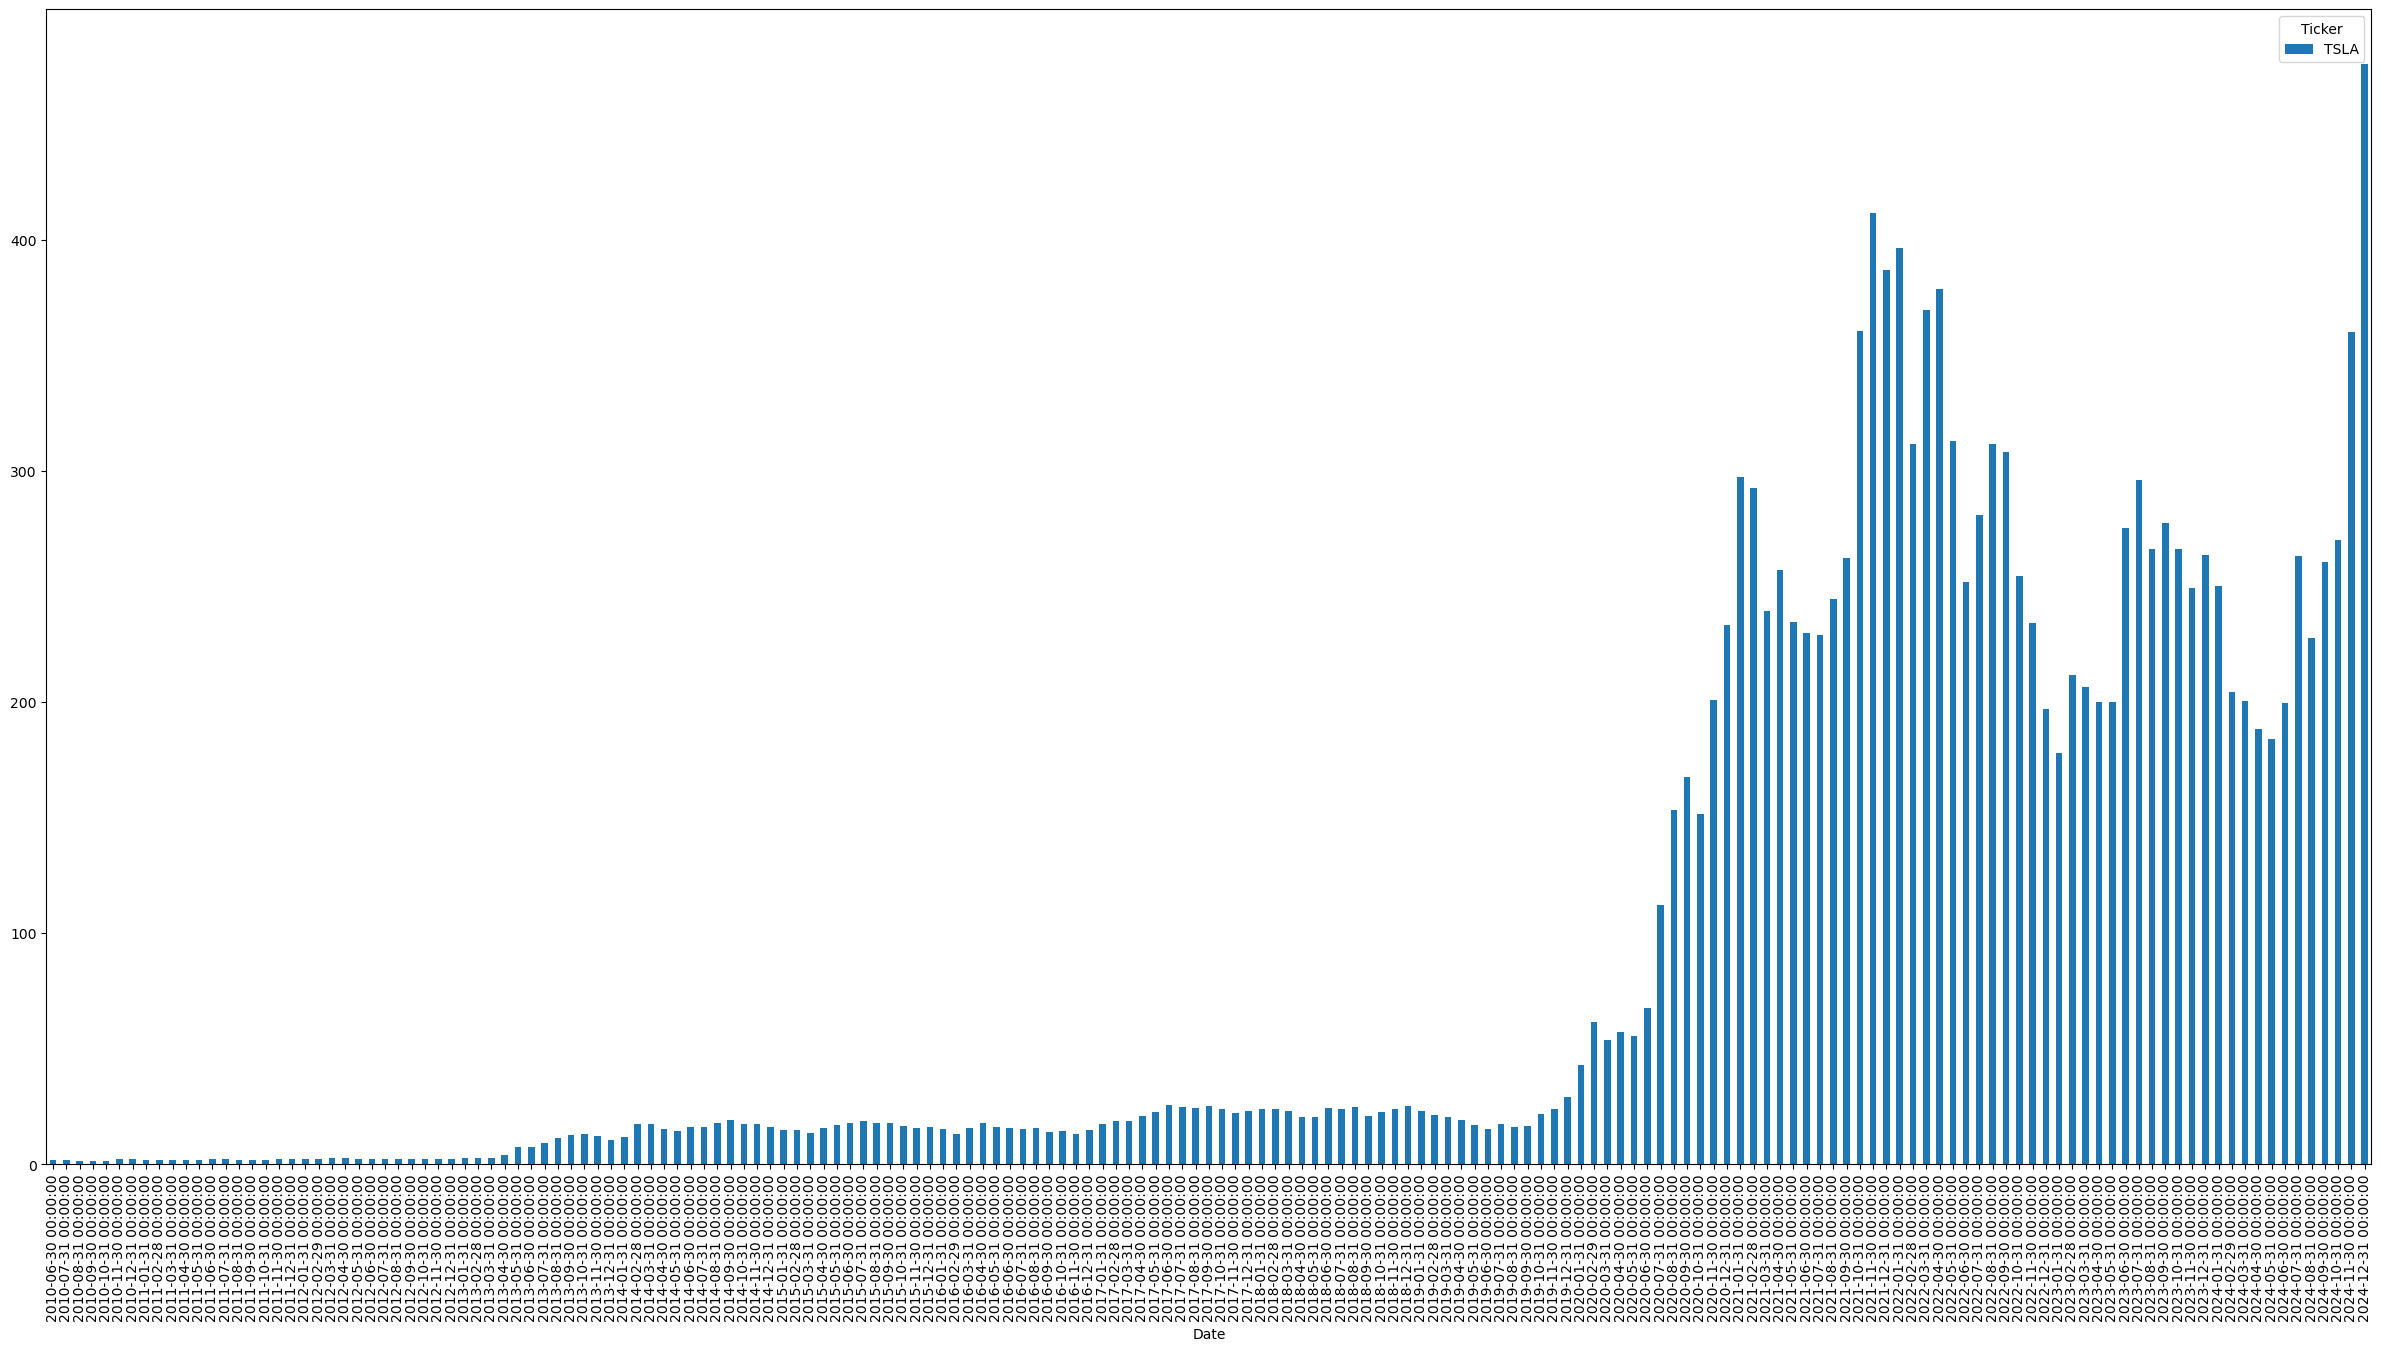

In [63]:
df_tesla['Open'].resample(rule='ME').max().plot(kind='bar',figsize=(30,15))
figure.autofmt_xdate()
plt.show()

The **`rolling()`** method in Python is a powerful tool for time series data analysis, particularly when working with pandas. It is used to calculate rolling (or moving) statistics, such as averages, sums, or standard deviations, over a specified window of time.

### Key Points About `rolling()`:

1. **Purpose**: The `rolling()` method helps smooth out short-term fluctuations and highlight long-term trends in time series data.

2. **How It Works**: 
   - You define a window size (e.g., 3, 7, 30), which determines how many data points are used to calculate the rolling statistic.
   - The method moves the window across the data, calculating the specified statistic for each position of the window.

3. **Common Parameters**:
   - **`window`**: Specifies the size of the moving window (e.g., 7 for a 7-day rolling window).
   - **`min_periods`**: Minimum number of observations required to have a valid result. If not specified, it defaults to the window size.
   - **`center`**: If `True`, the window is centered on the current observation; otherwise, it is aligned to the right.
   - **`win_type`**: Defines the type of window (e.g., 'boxcar', 'triang', 'hamming').
   - **`on`**: Specifies a column to perform the rolling operation if the data is not a time series.

In [64]:
df_tesla['High'].rolling(10)

Rolling [window=10,center=False,axis=0,method=single]

In [65]:
df_tesla['High'].rolling(11).max().head(20)

Ticker,TSLA
Date,
2010-06-29,NaN
2010-06-30,NaN
2010-07-01,NaN
2010-07-02,NaN
2010-07-06,NaN
2010-07-07,NaN
2010-07-08,NaN
2010-07-09,NaN
2010-07-12,NaN


In [66]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


### Let's a new column for rolling 30.

In [67]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [71]:
df_tesla.head(31)

Price,Close,High,Low,Open,Volume,Open:30 days rolling
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,NaN
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,NaN
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,NaN
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,NaN
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,NaN
2010-07-07,1.053333,1.108667,0.998667,1.093333,103825500,NaN
2010-07-08,1.164000,1.168000,1.038000,1.076000,115671000,NaN
2010-07-09,1.160000,1.193333,1.103333,1.172000,60759000,NaN


### **You may notice that only the 30th+ columns have values int values, other have NaN values. That part of the rolling effect.**

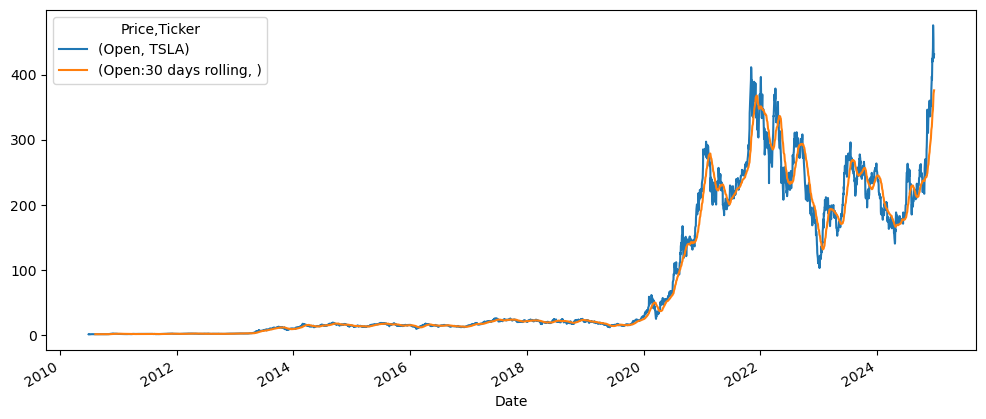

In [72]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))
plt.show()

### As you can see from 2010 to 2020 has values almost at point 0, the reason is because they are all NaN values. And that is nbecause of the rolling effect.

#### The orange line is the smoothed version of the zizage data.